In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train =pd.read_excel(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Practice Project\4rth Phase\Data_Train.xlsx', sheet_name ='Sheet1')
df_train =df_train.sample(frac =1)
df_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
607,CAFÉ,3799,"Cafe, Continental, Desserts",12noon – 10:30pm (Mon-Sun),Hyderabad,Gachibowli,4.0,1588 votes,700
9729,QUICK BITES,10866,"North Indian, Rajasthani",11am – 10am (Mon-Sun),Hyderabad,Madhapur,3.0,299 votes,350
3151,"BAR,CASUAL DINING",14366,"Continental, Chinese, Fast Food, Italian, Beve...",11am – 10pm (Mon-Sun),Kochi,MG Road,NEW,NaN,1000
1697,QUICK BITES,2040,"Healthy Food, Salad, Continental, Italian",9am – 10pm (Mon-Sun),Hyderabad,Jubilee Hills,3.7,42 votes,400
8469,CASUAL DINING,11100,"North Indian, Chinese, South Indian","11am – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Near Ramlila Ground,Railway Road,3.7,355 votes,500
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700
11853,QUICK BITES,9946,"Goan, Mangalorean","11am – 3pm, 6pm – 10:30pm (Mon-Sun)",Bangalore,Koramangala,3.4,7 votes,400
4199,CASUAL DINING,2690,"South Indian, Chinese",11am – 11pm (Mon-Sun),Kochi,Kakkanad,-,NaN,700
12258,CASUAL DINING,15540,"North Indian, Mughlai, Chinese","11am – 4pm, 7pm – 12midnight (Mon-Sun)",Navi Mumbai,Kharghar,3.7,1026 votes,700
9744,CAFÉ,13721,Cafe,"9am – 9pm (Mon, Wed, Thu, Fri, Sat), Closed...",Bangalore,Hennur,4.2,101 votes,500


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12690 entries, 607 to 12310
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 991.4+ KB


__There are missing values in the dataset. Let's find out and treat them.__

In [4]:
df_train[df_train['TITLE'].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
10742,NaN,5811,Chinese,11am – 10:45pm (Mon-Sun),Noida,Sector 29,3.9,110 votes,300
6199,NaN,2711,"North Indian, Biryani, Chinese",8am – 2am (Mon-Sun),Bangalore,Whitefield,3.5,11 votes,300
10995,NaN,2631,"Bakery, Desserts",8am – 10pm (Mon-Sun),Chennai,Vepery,3.3,9 votes,200
2918,NaN,1103,"Asian, Thai, Chinese",12noon – 11pm (Mon-Sun),NaN,NaN,4.8,161 votes,600
7642,NaN,4763,"Italian, Burger, Pizza, Chinese, Thai, Contine...",6pm – 4am (Mon-Sun),New Delhi,Punjabi Bagh,4.5,315 votes,750
...,...,...,...,...,...,...,...,...,...
6574,NaN,3560,"South Indian, North Indian",6:30am – 10pm (Mon-Sun),Chennai,Besant Nagar,3.5,53 votes,150
10024,NaN,3397,Fast Food,7pm – 12midnight (Mon-Sun),Noida,Sector 51,NEW,NaN,500
995,NaN,9404,"North Indian, Mughlai",12noon – 11:45pm (Mon-Sun),New Delhi,Lajpat Nagar 4,3.7,211 votes,500
3610,NaN,10844,"Chinese, North Indian, Fast Food",12noon – 10pm (Mon-Sun),New Delhi,Rohini,3.7,262 votes,300


In [5]:
# Deleting Title with null values
df_train.drop(df_train[df_train['TITLE'].isnull()].index, inplace =True)

In [6]:
# Again checking null values
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY               33
LOCALITY           18
RATING              2
VOTES            1067
COST                0
dtype: int64

__As we cannot fill correct title for restuarant, we will delete it.__

In [7]:
# Deleting records having null value in votes
df_train.drop(df_train[df_train['VOTES'].isnull()].index, inplace =True)

In [8]:
df_train.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY             27
LOCALITY         12
RATING            0
VOTES             0
COST              0
dtype: int64

In [9]:
# Deleting city and locality with null value
df_train.drop(df_train[df_train['CITY'].isnull()].index, inplace =True)
df_train.drop(df_train[df_train['LOCALITY'].isnull()].index, inplace =True)

In [10]:
# Checking null values
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [11]:
# Checking info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10593 entries, 607 to 12310
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          10593 non-null  object
 1   RESTAURANT_ID  10593 non-null  int64 
 2   CUISINES       10593 non-null  object
 3   TIME           10593 non-null  object
 4   CITY           10593 non-null  object
 5   LOCALITY       10593 non-null  object
 6   RATING         10593 non-null  object
 7   VOTES          10593 non-null  object
 8   COST           10593 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 827.6+ KB


In [12]:
df_train.drop_duplicates()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
607,CAFÉ,3799,"Cafe, Continental, Desserts",12noon – 10:30pm (Mon-Sun),Hyderabad,Gachibowli,4.0,1588 votes,700
9729,QUICK BITES,10866,"North Indian, Rajasthani",11am – 10am (Mon-Sun),Hyderabad,Madhapur,3.0,299 votes,350
1697,QUICK BITES,2040,"Healthy Food, Salad, Continental, Italian",9am – 10pm (Mon-Sun),Hyderabad,Jubilee Hills,3.7,42 votes,400
8469,CASUAL DINING,11100,"North Indian, Chinese, South Indian","11am – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Near Ramlila Ground,Railway Road,3.7,355 votes,500
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700
...,...,...,...,...,...,...,...,...,...
565,CASUAL DINING,4668,"North Indian, Chinese, South Indian, Continental",8am – 11pm (Mon-Sun),Hyderabad,Jubilee Hills,4.1,463 votes,900
3376,QUICK BITES,4817,"Chinese, North Indian",11am – 2am (Mon-Sun),Noida,Sector 18,3.9,75 votes,500
4964,QUICK BITES,4263,"Fast Food, Chinese",11am – 11pm (Mon-Sun),Hyderabad,Ameerpet,3.4,504 votes,300
12361,CAFÉ,14336,Cafe,10:30am – 10:30pm (Mon-Sun),Bangalore,Malleshwaram,3.3,6 votes,400


In [13]:
# Restuarant ID does not have any impact on cost prediction. So deleting it.
df_train.drop(columns =['RESTAURANT_ID'], inplace =True)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10593 entries, 607 to 12310
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     10593 non-null  object
 1   CUISINES  10593 non-null  object
 2   TIME      10593 non-null  object
 3   CITY      10593 non-null  object
 4   LOCALITY  10593 non-null  object
 5   RATING    10593 non-null  object
 6   VOTES     10593 non-null  object
 7   COST      10593 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 744.8+ KB


In [15]:
# Rating contain numerical data. Converting datatype.
df_train['RATING'] =df_train['RATING'].astype('float')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10593 entries, 607 to 12310
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     10593 non-null  object 
 1   CUISINES  10593 non-null  object 
 2   TIME      10593 non-null  object 
 3   CITY      10593 non-null  object 
 4   LOCALITY  10593 non-null  object 
 5   RATING    10593 non-null  float64
 6   VOTES     10593 non-null  object 
 7   COST      10593 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 744.8+ KB


In [17]:
# Conveting votes into int
df_train['VOTES'] =df_train['VOTES'].str.replace("votes", "")

In [18]:
df_train.head(10)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
607,CAFÉ,"Cafe, Continental, Desserts",12noon – 10:30pm (Mon-Sun),Hyderabad,Gachibowli,4.0,1588,700
9729,QUICK BITES,"North Indian, Rajasthani",11am – 10am (Mon-Sun),Hyderabad,Madhapur,3.0,299,350
1697,QUICK BITES,"Healthy Food, Salad, Continental, Italian",9am – 10pm (Mon-Sun),Hyderabad,Jubilee Hills,3.7,42,400
8469,CASUAL DINING,"North Indian, Chinese, South Indian","11am – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Near Ramlila Ground,Railway Road,3.7,355,500
24,CAFÉ,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493,700
11853,QUICK BITES,"Goan, Mangalorean","11am – 3pm, 6pm – 10:30pm (Mon-Sun)",Bangalore,Koramangala,3.4,7,400
12258,CASUAL DINING,"North Indian, Mughlai, Chinese","11am – 4pm, 7pm – 12midnight (Mon-Sun)",Navi Mumbai,Kharghar,3.7,1026,700
9744,CAFÉ,Cafe,"9am – 9pm (Mon, Wed, Thu, Fri, Sat), Closed...",Bangalore,Hennur,4.2,101,500
9590,QUICK BITES,"South Indian, Fast Food",7:30am – 11pm (Mon-Sun),Chennai,West Mambalam,3.8,68,100
2413,CASUAL DINING,North Indian,12noon – 12midnight (Mon-Sun),Chennai,Valasaravakkam,4.1,546,550


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10593 entries, 607 to 12310
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     10593 non-null  object 
 1   CUISINES  10593 non-null  object 
 2   TIME      10593 non-null  object 
 3   CITY      10593 non-null  object 
 4   LOCALITY  10593 non-null  object 
 5   RATING    10593 non-null  float64
 6   VOTES     10593 non-null  object 
 7   COST      10593 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 744.8+ KB


In [20]:
# Changing data of VOTES
df_train['VOTES'] =df_train["VOTES"].astype('int64')

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10593 entries, 607 to 12310
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     10593 non-null  object 
 1   CUISINES  10593 non-null  object 
 2   TIME      10593 non-null  object 
 3   CITY      10593 non-null  object 
 4   LOCALITY  10593 non-null  object 
 5   RATING    10593 non-null  float64
 6   VOTES     10593 non-null  int64  
 7   COST      10593 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 744.8+ KB


In [22]:
# Checking count of each column
for i in df_train:
    print(df_train[i].value_counts())

TITLE
QUICK BITES                     3674
CASUAL DINING                   3399
CAFÉ                             543
DESSERT PARLOR                   340
CASUAL DINING,BAR                335
                                ... 
SWEET SHOP,CONFECTIONERY           1
DESSERT PARLOR,PAAN SHOP           1
LOUNGE,FINE DINING                 1
CASUAL DINING,DESSERT PARLOR       1
KIOSK,FOOD COURT                   1
Name: count, Length: 110, dtype: int64
CUISINES
South Indian                                                      429
North Indian, Chinese                                             422
North Indian                                                      390
Fast Food                                                         215
Chinese                                                           140
                                                                 ... 
Asian, Chinese, Thai, Seafood, Momos, Burmese                       1
Chinese, Chettinad, South Indian, North Indian   

In [23]:
# Checking number of uniques values in each column
df_train.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
TITLE,110
CUISINES,3752
TIME,2366
CITY,298
LOCALITY,1226
RATING,30
VOTES,1830
COST,84


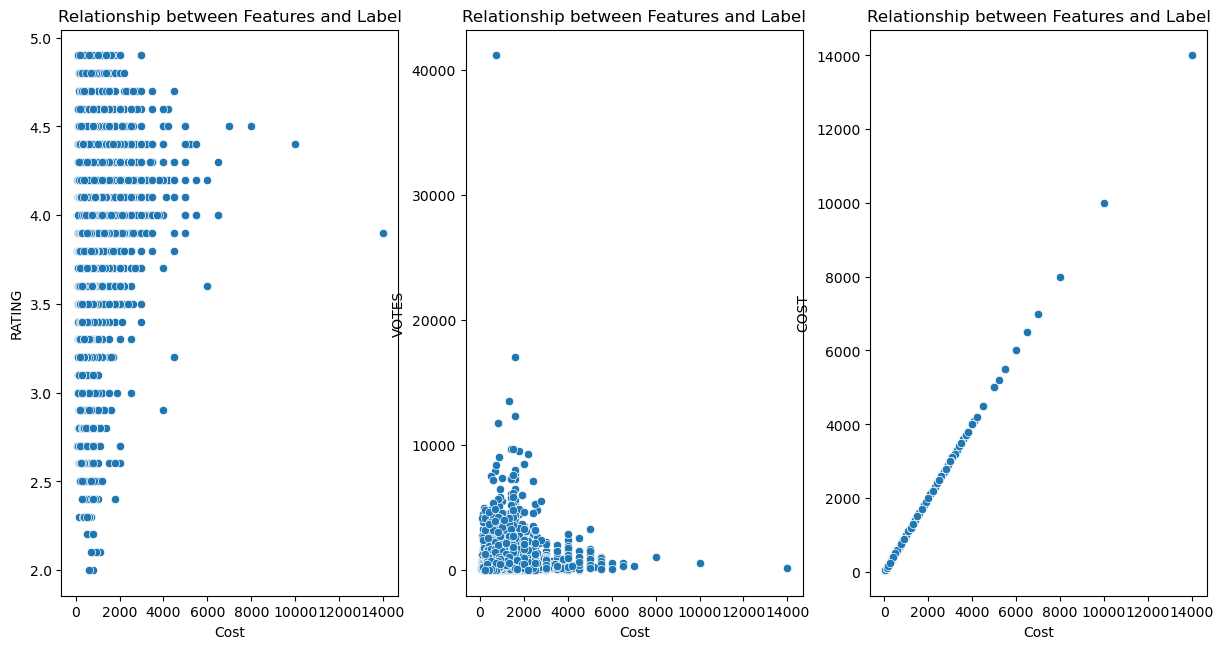

In [24]:
# Plotting scatter plot to check relationship between label and features
plt.figure(figsize =(20, 25))
plotnumber =1

for i in df_train:
    if plotnumber <= 12:
        if df_train[i].dtypes !='object':
            plt.subplot(3, 4, plotnumber)
            sns.scatterplot(x ='COST', y =i, data =df_train)
            plt.xlabel("Cost")
            plt.ylabel(i)
            plt.title("Relationship between Features and Label")
    plotnumber +=1
plt.show()

In [25]:
# Seperating numerical and categorical columns
cat_col =[]
for i in df_train:
    if df_train[i].dtypes =='object':
        cat_col.append(i)
        
num_col =[]
for i in df_train:
    if df_train[i].dtypes !='object':
        num_col.append(i)
        
print("Categorical Columns are :", cat_col)
print("Numerical Columns are :", num_col)

Categorical Columns are : ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
Numerical Columns are : ['RATING', 'VOTES', 'COST']


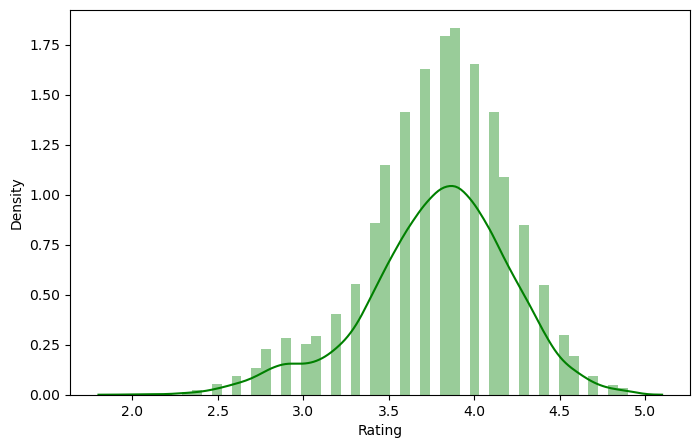

In [26]:
# Visualizing numerical columns
plt.figure(figsize =(8,5))
sns.distplot(df_train['RATING'], color ='g')
plt.xlabel("Rating", fontsize =10)
        
plt.show()

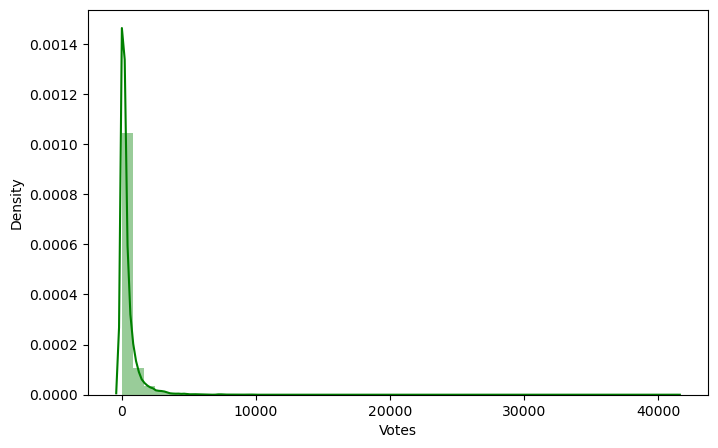

In [27]:
# Visualizing numerical columns
plt.figure(figsize =(8,5))
sns.distplot(df_train['VOTES'], color ='g')
plt.xlabel("Votes", fontsize =10)
        
plt.show()

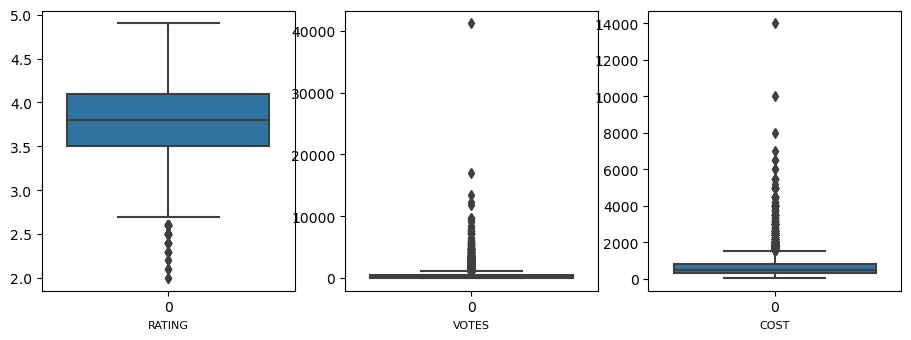

In [28]:
# Checking for outliers
plt.figure(figsize =(15,8))
plotnumber =1

for i in df_train:
    if df_train[i].dtypes !='object':
        if plotnumber <=8:
            plt.subplot(2,4, plotnumber)
            sns.boxplot(df_train[i])
            plt.xlabel(i, fontsize =8)
            
    plotnumber +=1
plt.show()

In [29]:
# Remove outliers using z score
df_zscore =df_train[['RATING', 'VOTES']]
z =np.abs(zscore(df_zscore))
z

,RATING,VOTES
607,0.510688,1.329886
9729,1.854838,0.150487
1697,0.198969,0.445643
8469,0.198969,0.086173
24,0.983794,0.072315
...,...,...
565,0.747241,0.037861
3376,0.274136,0.407744
4964,0.908627,0.084948
12361,1.145180,0.486988


In [30]:
np.where(z > 3)

(array([  101,   108,   150,   176,   216,   235,   279,   328,   397,
          410,   428,   478,   621,   623,   681,   727,   736,   807,
          821,   832,   844,   904,   920,   947,  1001,  1093,  1207,
         1329,  1345,  1426,  1466,  1570,  1638,  1671,  1714,  1735,
         1768,  1785,  1787,  1869,  1959,  1969,  1996,  2061,  2133,
         2172,  2264,  2267,  2300,  2305,  2375,  2390,  2398,  2405,
         2411,  2533,  2552,  2571,  2615,  2660,  2679,  2842,  2844,
         2885,  2890,  2920,  2936,  2952,  3057,  3085,  3106,  3222,
         3248,  3327,  3402,  3434,  3514,  3545,  3556,  3564,  3653,
         3695,  3803,  3888,  3933,  3999,  4012,  4098,  4159,  4250,
         4448,  4472,  4583,  4687,  4731,  4852,  4864,  4871,  4904,
         4911,  4947,  4955,  5000,  5111,  5169,  5177,  5226,  5263,
         5303,  5338,  5428,  5453,  5464,  5475,  5491,  5623,  5689,
         5739,  5746,  5957,  5998,  6099,  6149,  6194,  6250,  6255,
      

In [31]:
df_train =df_train[(z < 3).all(axis =1)]
df_train.shape

(10368, 8)

In [32]:
# Calculating data loss after removing outliers
print("Data Loss :",((10593-10368)/10593)*100)

Data Loss : 2.1240441801189465


In [33]:
# Checking skewness in dataset
df =df_train[num_col]
df.skew()

RATING   -0.424660
VOTES     2.500257
COST      3.872815
dtype: float64

In [34]:
# Removing skewness
df_train['VOTES'] =np.cbrt(df_train['VOTES'])

In [35]:
# Checking skewness in dataset
df =df_train[num_col]
df.skew()

RATING   -0.424660
VOTES     0.771602
COST      3.872815
dtype: float64

In [36]:
# Encoding categorical columns using OridnalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()
for i in df_train:
    if df_train[i].dtype =='object':
        df_train[i] =OE.fit_transform(df_train[i].values.reshape(-1,1))
        
df_train

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
607,21.0,709.0,921.0,113.0,295.0,4.0,11.666757,700
9729,92.0,3027.0,400.0,113.0,538.0,3.0,6.686883,350
1697,92.0,1938.0,2094.0,113.0,397.0,3.7,3.476027,400
8469,29.0,2748.0,558.0,204.0,876.0,3.7,7.080699,500
24,21.0,832.0,481.0,210.0,254.0,4.2,7.899792,700
...,...,...,...,...,...,...,...,...
565,29.0,2751.0,1989.0,113.0,397.0,4.1,7.736188,900
3376,92.0,1115.0,546.0,216.0,978.0,3.9,4.217163,500
4964,92.0,1706.0,481.0,113.0,72.0,3.4,7.958114,300
12361,21.0,613.0,10.0,28.0,564.0,3.3,1.817121,400


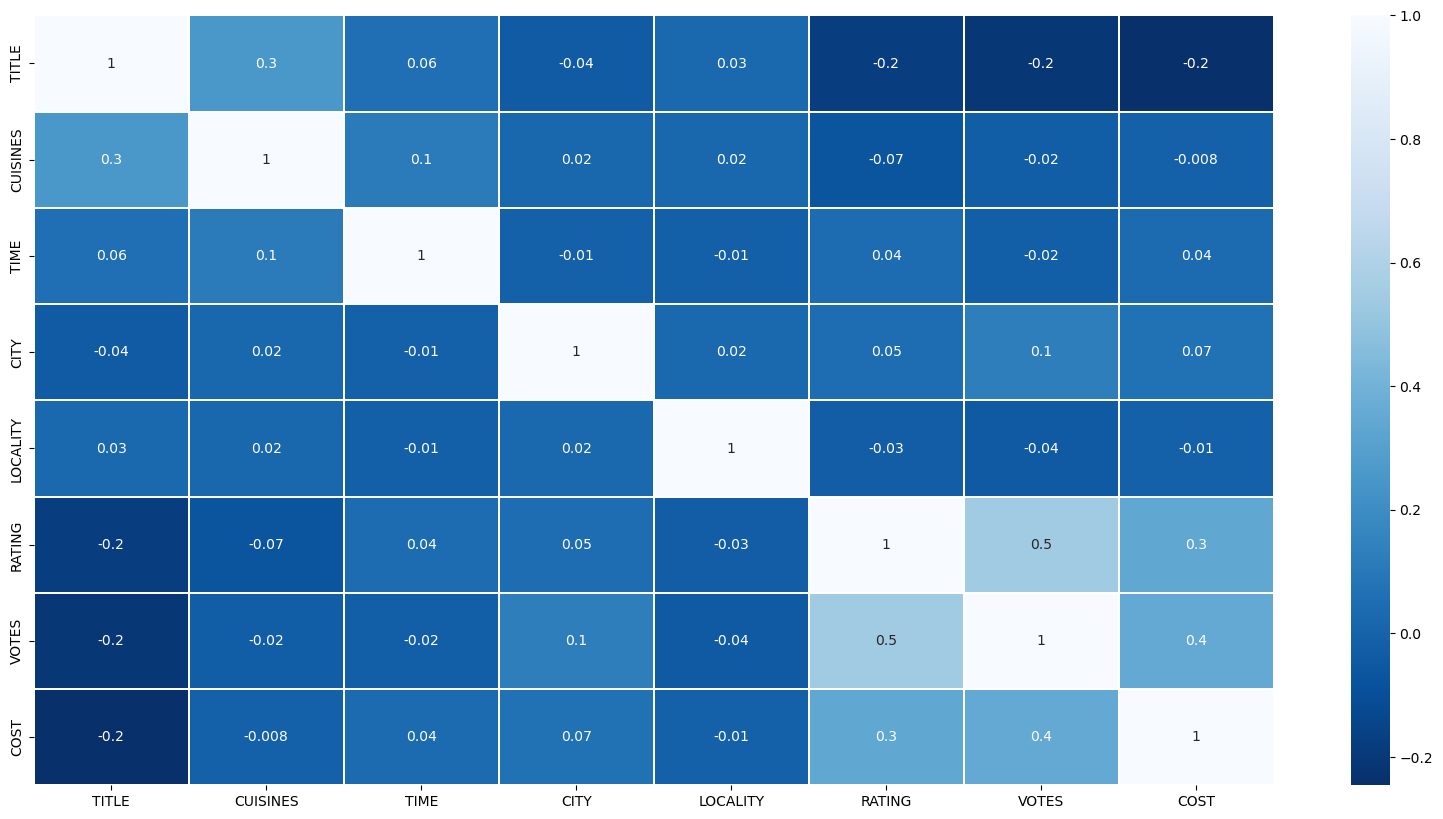

In [37]:
# Plotting heatmap
plt.figure(figsize =(20, 10))
sns.heatmap(df_train.corr(), annot =True, fmt ='.1g', linewidth =0.1, cmap ='Blues_r')
plt.show()

__No Multicollinearity found in heatmap__

In [38]:
# Seperating Features and label
x =df_train.drop(columns =['COST'])
y =df_train[['COST']]

In [39]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
607,21.0,709.0,921.0,113.0,295.0,4.0,11.666757
9729,92.0,3027.0,400.0,113.0,538.0,3.0,6.686883
1697,92.0,1938.0,2094.0,113.0,397.0,3.7,3.476027
8469,29.0,2748.0,558.0,204.0,876.0,3.7,7.080699
24,21.0,832.0,481.0,210.0,254.0,4.2,7.899792
...,...,...,...,...,...,...,...
565,29.0,2751.0,1989.0,113.0,397.0,4.1,7.736188
3376,92.0,1115.0,546.0,216.0,978.0,3.9,4.217163
4964,92.0,1706.0,481.0,113.0,72.0,3.4,7.958114
12361,21.0,613.0,10.0,28.0,564.0,3.3,1.817121


### Feature Scaling using Standard Scaler

In [40]:
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-1.046693,-1.172177,-0.143144,-0.039847,-0.771276,0.532057,2.101272
1,1.164516,1.007019,-0.950150,-0.039847,-0.060577,-1.930496,0.263298
2,1.164516,-0.016771,1.673779,-0.039847,-0.472958,-0.206709,-0.921766
3,-0.797543,0.744726,-0.705415,1.238696,0.927967,-0.206709,0.408648
4,-1.046693,-1.056542,-0.824684,1.322996,-0.891188,1.024567,0.710959
...,...,...,...,...,...,...,...
10363,-0.797543,0.747546,1.511139,-0.039847,-0.472958,0.778312,0.650576
10364,1.164516,-0.790488,-0.724002,1.407296,1.226285,0.285801,-0.648227
10365,1.164516,-0.234878,-0.824684,-0.039847,-1.423482,-0.945475,0.732484
10366,-1.046693,-1.262428,-1.554242,-1.234092,0.015465,-1.191730,-1.534036


In [41]:
# Checking Variance inflation factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,1.124406,TITLE
1,1.084677,CUISINES
2,1.019708,TIME
3,1.019446,CITY
4,1.003546,LOCALITY
5,1.442480,RATING
6,1.476240,VOTES


### We have completed preprocessing step. Now we can build model.

In [42]:
# Finding best random state
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.25, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc, "at random state :", maxrs)

Maximum accuracy is : 0.2257794519844184 at random state : 23


In [43]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [44]:
# Initializing models
lr =LinearRegression()
knn =KNeighborsRegressor()
RFR =RandomForestRegressor()
GBR =GradientBoostingRegressor()
lasso =Lasso()
ridge =Ridge()
DTR =DecisionTreeRegressor()
ETR =ExtraTreesRegressor()

In [45]:
models ={'LinearRegression': lr,
        'KNeighborsRegressor': knn,
        'RandomForestRegressor': RFR,
        'GradientBoostingRegressor': GBR,
        'Lasso': lasso,
        'Ridge': ridge,
        'DecisionTreeRegressor': DTR,
        'ExtraTreesRegressor': ETR,
        }

for name, model in models.items():
    model.fit(x_train, y_train)
    test_pred =model.predict(x_test)
    train_pred =model.predict(x_train)
    
    print(name)
    print("x"*20)
    print("R2 score on Training Data: ", r2_score(y_train, train_pred)*100)
    print("R2 score on Test Data: ", r2_score(y_test, test_pred)*100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, test_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_test, test_pred)))
    print('\n')
    
    #Cross Validation
    score =cross_val_score(model, x, y, cv =5)
    print("Cross Validation")
    print("x"*20)
    print(score)
    print(score.mean())
    print("Difference between R2 Score and Cross Val Score is : ", (r2_score(y_test, test_pred) - score.mean())*100)
    print("="*80)
    print('\n')

LinearRegression
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  17.112632186381582
R2 score on Test Data:  22.539226059669947
Mean Absolute Error:  339.2743317495003
Mean Squared Error:  281012.835874464
Root Mean Squared Error:  18.41940096065831


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.18616489 0.19502578 0.1842503  0.16400478 0.19205906]
0.1843009614371937
Difference between R2 Score and Cross Val Score is :  4.109129915950577


KNeighborsRegressor
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  61.01016306938182
R2 score on Test Data:  40.12465734085797
Mean Absolute Error:  277.26068788171006
Mean Squared Error:  217216.26293796208
Root Mean Squared Error:  16.65114674374441


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.40690515 0.36697487 0.43944817 0.36668614 0.49330707]
0.4146642783709648
Difference between R2 Score and Cross Val Score is :  -1.341770496238509


RandomForestRegressor
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  96.05177082814451
R2 score on Test Data:  68

__Random Forest is our best model with accuracy 71.22%__

In [46]:
parameters = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12], 
    'max_leaf_nodes': [3, 6, 9, 14], 
} 

In [47]:
GCV =GridSearchCV(RandomForestRegressor(), parameters, cv =5)

In [48]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9, 14],
                         'n_estimators': [25, 50, 100, 150]})

In [49]:
GCV.best_params_

{'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': 14,
 'n_estimators': 100}

In [61]:
Final_model =RandomForestRegressor(max_depth =12,
                                   max_features =None,
                                   max_leaf_nodes =14,
                                   n_estimators =100,
                                  random_state =348)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)

print("Accuracy after hyperparamter tunning is :", acc*100)

Accuracy after hyperparamter tunning is : 61.243518218430324


In [64]:
RFR =RandomForestRegressor()
RFR.fit(x_train, y_train)
pred =RFR.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 68.88489875125327


In [65]:
# Saving model
pickle.dump(RFR, open('Restaurant Food Cost.pkl', 'wb'))

In [66]:
# Loading Model
loaded_model =pickle.load(open('Restaurant Food Cost.pkl', 'rb'))
pred =loaded_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 68.88489875125327


__Accuracy does not increase after hyperparameter tunning.__

## Data preprocessing on test data

In [175]:
df_test =pd.read_excel(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Practice Project\4rth Phase/Data_Test.xlsx', sheet_name ='Sheet1')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [176]:
# Checing for duplicate records
df_test[df_test.duplicated()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
3242,CASUAL DINING,12535,"North Indian, Italian",11:30am – 12:30AM (Mon-Sun),Mumbai,Fort,4.2,876 votes


__One duplicate record found__

In [177]:
# Deleting duplicate record
df_test =df_test.drop_duplicates()

__Duplicate record is deleted__

In [178]:
# Checking dataset information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4230 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3946 non-null   object
 1   RESTAURANT_ID  4230 non-null   int64 
 2   CUISINES       4230 non-null   object
 3   TIME           4230 non-null   object
 4   CITY           4195 non-null   object
 5   LOCALITY       4200 non-null   object
 6   RATING         4228 non-null   object
 7   VOTES          3828 non-null   object
dtypes: int64(1), object(7)
memory usage: 297.4+ KB


In [179]:
#Checking null values in title
df_test[df_test['TITLE'].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
8,NaN,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
17,NaN,3931,"Fast Food, Chinese, Momos",11am – 12midnight (Mon-Sun),Faridabad,NIT,3.8,639 votes
65,NaN,5409,North Indian,9am – 9:30pm (Mon-Sun),New Delhi,Subhash Nagar,3.9,174 votes
102,NaN,14231,"North Indian, Chinese",11am – 11pm (Mon-Sun),Faridabad,NIT,NEW,NaN
...,...,...,...,...,...,...,...,...
4144,NaN,2757,"North Indian, Chinese, Andhra",11:30am – 10:30pm (Mon-Sun),Hyderabad,Jubilee Hills,3.1,34 votes
4147,NaN,4403,"Bakery, Desserts","Closed (Mon),8am – 9pm (Tue-Sun)",Secunderabad,Sainikpuri,4.9,775 votes
4180,NaN,13568,"Chinese, North Indian","11am – 4pm, 6pm – 11:30pm (Mon-Sun)",Mumbai,Khar,3.3,9 votes
4218,NaN,11667,"North Indian, Biryani",12:30pm – 10:15pm (Mon-Sun),Bangalore,Jalahalli,3.3,6 votes


In [180]:
# Deleting null titles
df_test.drop(df_test[df_test['TITLE'].isnull()].index, inplace =True)

In [181]:
# Checking dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3946 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3946 non-null   object
 1   RESTAURANT_ID  3946 non-null   int64 
 2   CUISINES       3946 non-null   object
 3   TIME           3946 non-null   object
 4   CITY           3931 non-null   object
 5   LOCALITY       3936 non-null   object
 6   RATING         3945 non-null   object
 7   VOTES          3571 non-null   object
dtypes: int64(1), object(7)
memory usage: 277.5+ KB


In [182]:
# Deleting city with null values
df_test.drop(df_test[df_test['CITY'].isnull()].index, inplace =True)

In [183]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3931 non-null   object
 1   RESTAURANT_ID  3931 non-null   int64 
 2   CUISINES       3931 non-null   object
 3   TIME           3931 non-null   object
 4   CITY           3931 non-null   object
 5   LOCALITY       3931 non-null   object
 6   RATING         3930 non-null   object
 7   VOTES          3556 non-null   object
dtypes: int64(1), object(7)
memory usage: 276.4+ KB


In [184]:
df_test[df_test['RATING']=='NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
21,CASUAL DINING,3852,"North Indian, South Indian",12noon – 11pm (Mon-Sun),Chennai,Anna Salai,NEW,NaN
24,QUICK BITES,8102,"Biryani, Andhra, North Indian",11am – 11pm (Mon-Sun),Bangalore,Banaswadi,NEW,NaN
27,CASUAL DINING,4696,"Continental, Italian","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,BTM,NEW,NaN
29,QUICK BITES,14208,"North Indian, Chinese",12noon – 1am (Mon-Sun),Mumbai,Bandra West,NEW,NaN
...,...,...,...,...,...,...,...,...
4181,CASUAL DINING,681,"American, Italian",7pm – 1am (Mon-Sun),Mumbai,Fort,NEW,NaN
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN
4185,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,NaN
4198,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,NaN


__201 Ratings have value as New. We will fill it with 0.__ 

In [185]:
# Replacing New with 0
df_test['RATING'] =df_test['RATING'].str.replace('NEW', '0')

In [186]:
df_test[df_test['RATING'] =='-']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
37,QUICK BITES,5854,"Kerala, Fast Food",5am – 9pm (Mon-Sun),Kochi,Edappally,-,NaN
66,QUICK BITES,414,South Indian,10am – 10pm (Mon-Sun),Kochi,Pallimukku,-,NaN
73,QUICK BITES,3331,"Kerala, South Indian",Not Available,Kochi,Thevera,-,NaN
108,BAKERY,1323,Bakery,9:30am – 10:30pm (Mon-Sun),Kochi,Thopumpady,-,NaN
130,BEVERAGE SHOP,6507,Beverages,9am – 8:30pm (Mon-Sun),Kochi,Marine Drive,-,NaN
...,...,...,...,...,...,...,...,...
4026,QUICK BITES,1278,"Chinese, South Indian",10am – 9pm (Mon-Sun),Kochi,Kaloor,-,NaN
4030,CASUAL DINING,5915,"Kerala, Biryani",7am – 11pm (Mon-Sun),Kochi,Kacheripady,-,NaN
4109,CASUAL DINING,3829,"Italian, Desserts, Continental",10am – 12midnight (Mon-Sun),KK Road,Near Express Garden,-,NaN
4172,QUICK BITES,5365,"North Indian, Chinese, Kerala",9am – 11pm (Mon-Sun),Kochi,Palarivattom,-,NaN


In [187]:
df_test['RATING'] =df_test['RATING'].replace('-',np.nan)

In [188]:
# Deleting Rating with null values
df_test.drop(df_test[df_test['RATING'].isnull()].index, inplace =True)

In [189]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3757 non-null   object
 1   RESTAURANT_ID  3757 non-null   int64 
 2   CUISINES       3757 non-null   object
 3   TIME           3757 non-null   object
 4   CITY           3757 non-null   object
 5   LOCALITY       3757 non-null   object
 6   RATING         3757 non-null   object
 7   VOTES          3556 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.2+ KB


In [190]:
# Converting Rating to float
df_test['RATING'] =df_test['RATING'].astype('float')

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          3757 non-null   object 
 1   RESTAURANT_ID  3757 non-null   int64  
 2   CUISINES       3757 non-null   object 
 3   TIME           3757 non-null   object 
 4   CITY           3757 non-null   object 
 5   LOCALITY       3757 non-null   object 
 6   RATING         3757 non-null   float64
 7   VOTES          3556 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 264.2+ KB


In [202]:
# Converting Votes into int datatype
df_test['VOTES']=df_test['VOTES'].str.replace("votes", "")
df_test['VOTES'] =df_test['VOTES'].astype('int')

In [193]:
df_test.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,0.0,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6
10,"DESSERT PARLOR,QUICK BITES",4079,"Desserts, Fast Food","11am – 11pm (Mon),10:30am – 11pm (Tue-Fri),10a...",Bangalore,Electronic City,3.8,166
11,QUICK BITES,8873,"South Indian, North Indian, Chinese, Street Food",11am – 10:30pm (Mon-Sun),Chennai,West Mambalam,3.7,46


In [198]:
# Filling Votes NaN values
df_test['VOTES'].fillna(df_test['VOTES'].mode()[0], inplace =True)

In [199]:
df_test[df_test['VOTES'].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES


In [200]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36
...,...,...,...,...,...,...,...,...
4224,QUICK BITES,331,"Kerala, South Indian","12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...",Bangalore,Indiranagar,3.8,410
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53


In [203]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          3757 non-null   object 
 1   RESTAURANT_ID  3757 non-null   int64  
 2   CUISINES       3757 non-null   object 
 3   TIME           3757 non-null   object 
 4   CITY           3757 non-null   object 
 5   LOCALITY       3757 non-null   object 
 6   RATING         3757 non-null   float64
 7   VOTES          3757 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 249.5+ KB


In [204]:
# Checking number of uniques values in each column
df_test.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
TITLE,82
RESTAURANT_ID,3670
CUISINES,1616
TIME,1081
CITY,144
LOCALITY,793
RATING,30
VOTES,1113


In [206]:
# Deleting REstaurant ID columns
df_test.drop(columns =['RESTAURANT_ID'], inplace =True)

In [207]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     3757 non-null   object 
 1   CUISINES  3757 non-null   object 
 2   TIME      3757 non-null   object 
 3   CITY      3757 non-null   object 
 4   LOCALITY  3757 non-null   object 
 5   RATING    3757 non-null   float64
 6   VOTES     3757 non-null   int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 220.1+ KB


In [209]:
# Seperating numerical and categorical columns
cat_col =[]
for i in df_test:
    if df_test[i].dtypes =='object':
        cat_col.append(i)
        
num_col =[]
for i in df_test:
    if df_test[i].dtypes !='object':
        num_col.append(i)
        
print("Categorical Columns are :", cat_col)
print("Numerical Columns are :", num_col)

Categorical Columns are : ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
Numerical Columns are : ['RATING', 'VOTES']


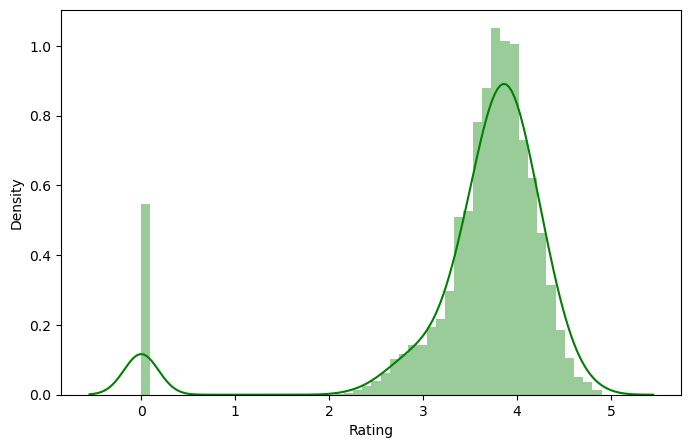

In [210]:
# Visualizing numerical columns
plt.figure(figsize =(8,5))
sns.distplot(df_test['RATING'], color ='g')
plt.xlabel("Rating", fontsize =10)
        
plt.show()

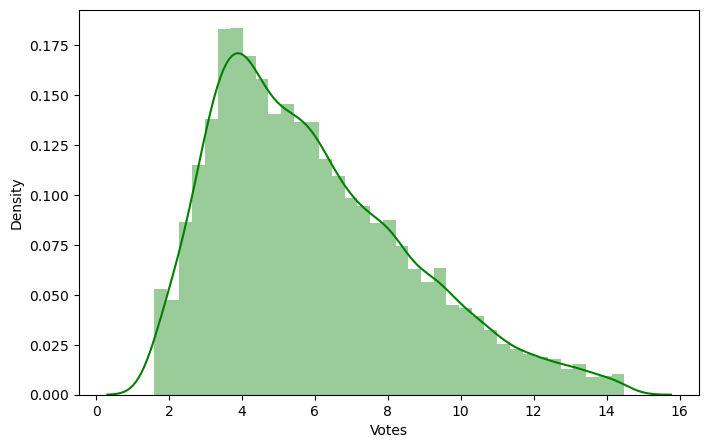

In [211]:
# Visualizing numerical columns
plt.figure(figsize =(8,5))
sns.distplot(df_train['VOTES'], color ='g')
plt.xlabel("Votes", fontsize =10)
        
plt.show()

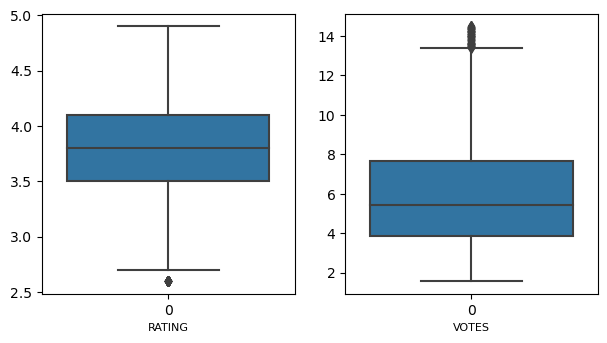

In [212]:
# Checking for outliers
plt.figure(figsize =(15,8))
plotnumber =1

for i in df_test:
    if df_test[i].dtypes !='object':
        if plotnumber <=8:
            plt.subplot(2,4, plotnumber)
            sns.boxplot(df_train[i])
            plt.xlabel(i, fontsize =8)
            
    plotnumber +=1
plt.show()

In [213]:
# Remove outliers using z sc# Checking skewness in dataset
df_zscore =df_test[['RATING', 'VOTES']]
z =np.abs(zscore(df_zscore))
z

,RATING,VOTES
0,0.760134,0.171041
1,0.654835,0.428475
2,0.233637,0.084022
4,0.023039,0.473767
5,0.128338,0.458272
...,...,...
4224,0.233637,0.012509
4225,0.444236,0.266379
4226,0.338937,0.159110
4228,0.128338,0.438011


In [215]:
df_test =df_test[(z < 3).all(axis =1)]
df_test.shape

(3491, 7)

In [217]:
# Checking skewness
df =df_test[num_col]
df.skew()

RATING   -0.631827
VOTES     2.452992
dtype: float64

In [218]:
# Removing skewness
df_test['VOTES'] =np.cbrt(df_test['VOTES'])

In [219]:
# Checking skewness
df =df_test[num_col]
df.skew()

RATING   -0.631827
VOTES     0.703425
dtype: float64

In [221]:
# Encoding categorical columns using OridnalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()
for i in df_test:
    if df_test[i].dtype =='object':
        df_test[i] =OE.fit_transform(df_test[i].values.reshape(-1,1))
        
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,22.0,1136.0,444.0,101.0,598.0,4.3,8.262149
1,70.0,1427.0,817.0,88.0,203.0,4.2,3.936497
2,22.0,1283.0,190.0,88.0,378.0,3.8,7.047299
4,70.0,1431.0,184.0,72.0,274.0,3.6,2.843867
5,51.0,813.0,616.0,55.0,69.0,3.7,3.301927
...,...,...,...,...,...,...,...
4224,70.0,920.0,561.0,9.0,237.0,3.8,7.428959
4225,70.0,1255.0,726.0,88.0,203.0,4.0,5.818648
4226,22.0,1255.0,90.0,99.0,538.0,3.9,6.596202
4228,70.0,599.0,919.0,41.0,627.0,3.7,3.756286


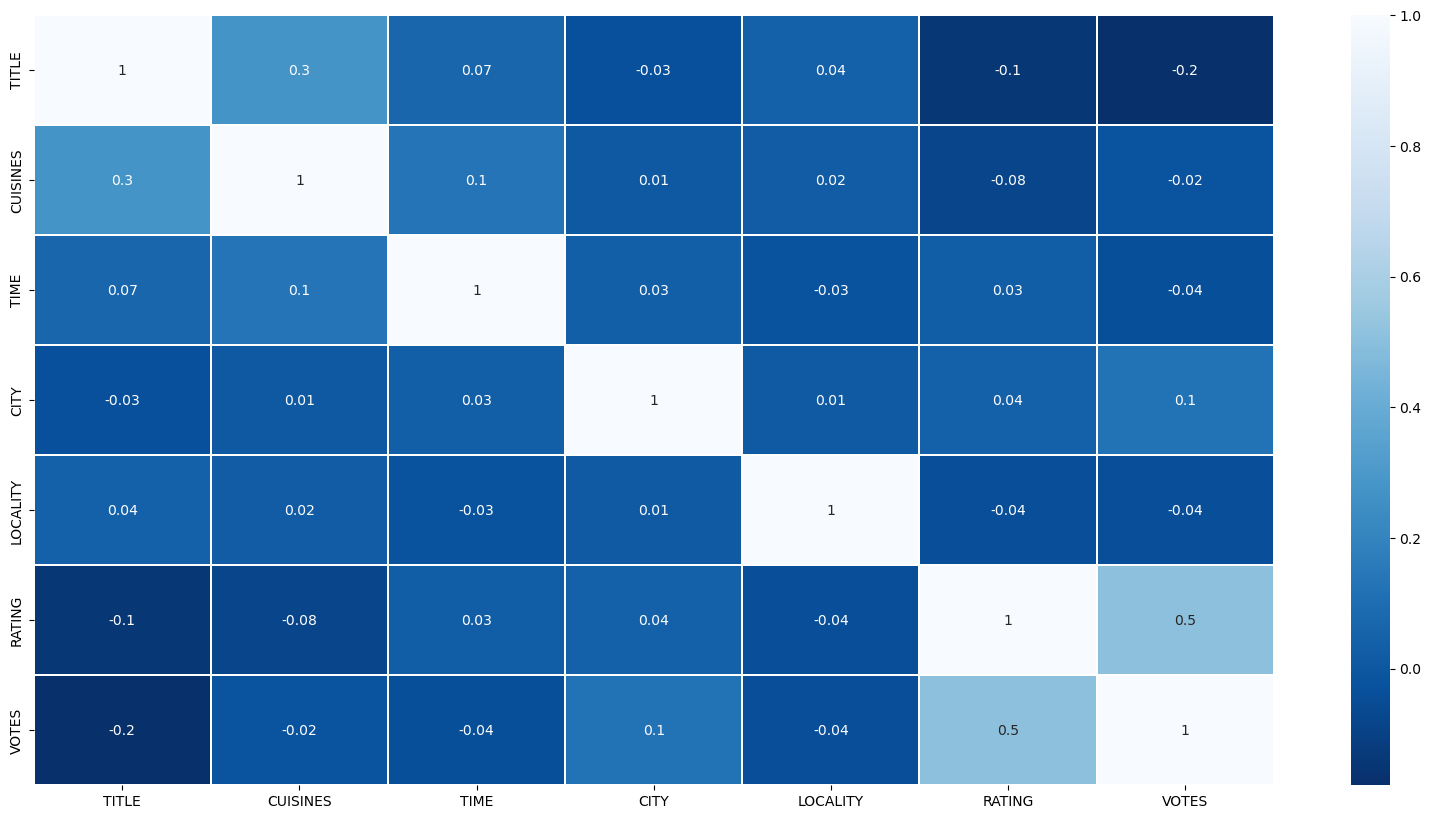

In [222]:
# Plotting heatmap
plt.figure(figsize =(20, 10))
sns.heatmap(df_test.corr(), annot =True, fmt ='.1g', linewidth =0.1, cmap ='Blues_r')
plt.show()

__No Multcollinearity found in the dataset.__

In [223]:
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(df_test), columns =df_test.columns)
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.775843,0.725927,-0.034490,1.351218,1.181653,1.238373,0.846855
1,1.162006,1.385808,1.234064,0.980569,-0.679835,1.005080,-0.762961
2,-0.775843,1.059269,-0.898331,0.980569,0.144875,0.071906,0.394741
3,1.162006,1.394878,-0.918737,0.524387,-0.345238,-0.394681,-1.169590
4,0.394941,-0.006519,0.550474,0.039692,-1.311327,-0.161387,-0.999120
...,...,...,...,...,...,...,...
3486,1.162006,0.236118,0.363421,-1.271834,-0.519605,0.071906,0.536778
3487,1.162006,0.995775,0.924578,0.980569,-0.679835,0.538493,-0.062508
3488,-0.775843,0.995775,-1.238426,1.294195,0.898896,0.305199,0.226863
3489,1.162006,-0.491793,1.580961,-0.359468,1.318320,-0.161387,-0.830028


In [224]:
# Checking Variance inflation factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,1.122590,TITLE
1,1.106706,CUISINES
2,1.027654,TIME
3,1.018696,CITY
4,1.004937,LOCALITY
5,1.364318,RATING
6,1.396106,VOTES


### EDA completed for test data. Now we can pass test to our model

In [225]:
# Loading Model
loaded_model =pickle.load(open('Restaurant Food Cost.pkl', 'rb'))
pred =loaded_model.predict(x)
print(pred)

[1213.5  325.   617.5 ...  704.   298.   324.5]


__As test data does not have target variable, so accuracy cannot be calculated.__